# Dimensionality Reduction and SVD

## Prerequisities


Students should have completed:

- Reading of _Dimensionality Reduction and SVD_


## Learning Objectives

After reading this notebook, students should be able to:

- Apply Singular Value Decomposition to reduce dimension of a dataset.

In this programming material, we will see one of the applications of dimensionality reduction using Singular Value Decomposition (SVD). The application is of Image Processing. We will decompose an image (matrix of pixels) using SVD and then, we will reduce the rank of the matrix, which ultimately reduces the dimension of the image. This process is widely called, Image Compression. The compressed image has to contain as much as information from the original image as possible. Let us try out one example here.

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.rcParams['figure.figsize']=[14,6]

In [4]:
import gdown
from pathlib import Path

gdown.download("https://doc.google.com/a/fusemachines.com/uc?id=1OjhRuFeFyFHz972QXdUxhYTXGhfIFssj", "fox.jpg")

image_file = Path("fox.jpg")

Downloading...
From: https://doc.google.com/a/fusemachines.com/uc?id=1OjhRuFeFyFHz972QXdUxhYTXGhfIFssj
To: C:\Users\Dell\Downloads\fox.jpg
100%|████████████████████████████████████████████████████████████████████████████████| 140k/140k [00:00<00:00, 642kB/s]


In [5]:
# Loading image

from PIL import Image

img = Image.open(image_file)

# Convert image to grayscale
X = img.convert('L') 

np.array(X).shape

(640, 960)


The image has been changed to grey scale for the reasons regarding simplicity in computation. The matrix has $640$ rows and $906$ columns. Now, we will plot the image.

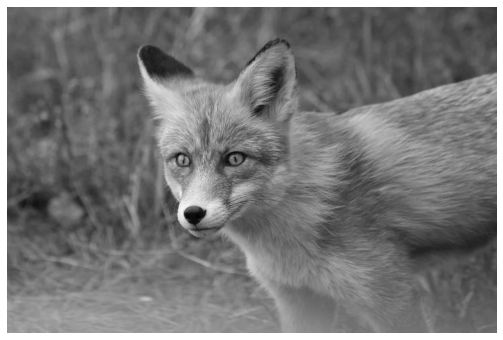

In [6]:
# plotting image
img=plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

So, this is the image. Now, we will decompose the image matrix using Singular Value Decomposition (SVD). Then, we will extract the singular values from $\mathbf{Σ}$.  

In [7]:
#decomposing in SVD form
U, S, VT = np.linalg.svd(X, full_matrices=False)

# let us extract diagonal elements 
Sdiag=np.diag(S)

Now that we have decomposed the matrix, we will focus on the dimensionality reduction part. Here, we will reduce the rank. We will remove the diagonal singular values ranging fron the end of the matrix, which reduces the rank and untimately the dimension. We will reconstruct the image in these lower dimensions. First we will reconstruct the original image with first $5$ singular values and then with first $20$ singular values and lastly with first $100$ singular values.

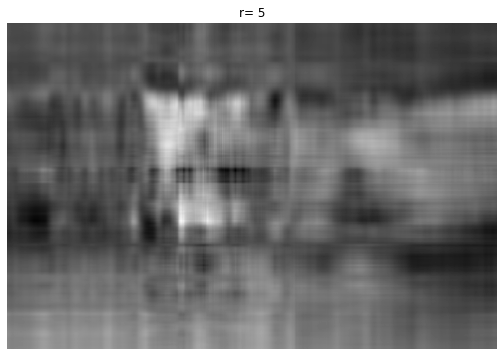

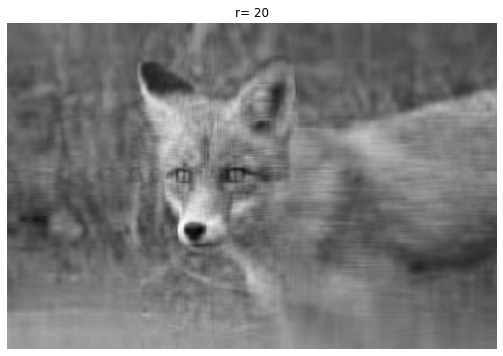

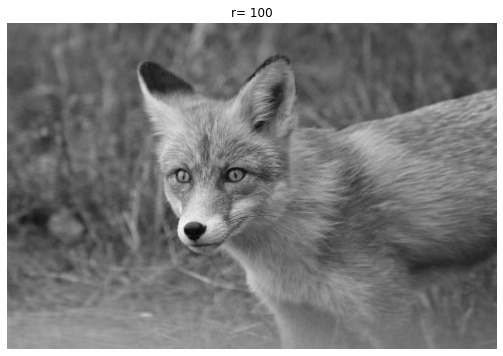

In [8]:
#function for reconstruction of matrix/image using 'r' components.
def reconstructing_matrix(U,S,VT,r):
  
  """
    Reconstruct matrix using U,S and VT matrix of svd factorization using 'r' singular components 
  """

  Xapp = np.dot(U[:,:r], np.dot(S[0:r,:r], VT[:r,:]))
  return Xapp

for j,r in enumerate((5,20,100)):
    #approximating by taking select top few singular values
    Xapp = reconstructing_matrix(U,Sdiag,VT,r)
    plt.figure(j+1)
    img = plt.imshow(Xapp)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title(f'r= {str(r)}')
    plt.show()

The plots are specified with the number of singular values on the top of the picture. We see that first five singular values are insufficient to reconstruct the image. Similarly, top 20 singular values are far better in reconstructing the image. With hundred top singular values, the reconstructed image is good. It resembles the original image. In such conditions we can reduce the rank to $100$, thus lowering the dimension.


Lastly, we will see how the amount of singular values or rank is related to the information recovered.

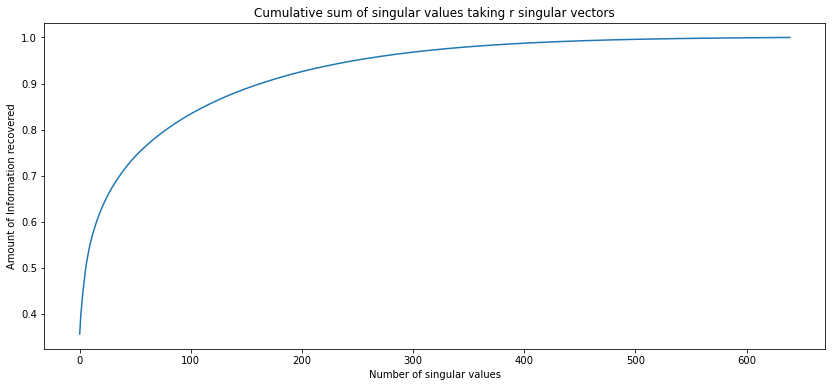

In [9]:

plt.figure(2)
plt.plot(np.cumsum(np.diag(Sdiag))/np.sum(np.diag(Sdiag)))
plt.title('Cumulative sum of singular values taking r singular vectors')
plt.xlabel('Number of singular values')
plt.ylabel('Amount of Information recovered')
plt.show()

From the graph, you can see that around 70 % of the total information can be recovered with first $100$ singular values. Here the rank or dimension decreases to $100$ from the original high dimension. The singular values beyond that contain very little information, and they can be discarded.

## Conclusion

In this programming material, we implemented one of the the applications of Singular Value Decomposition (SVD), that is Dimensionality Reduction. Image compression is a popular example of dimension reduction. We also saw how lowering the dimension with the removal of singular values impact on the reconstruction of the image.